# **HEART DISEASE PREDICTION**

## **INTRODUCTION**
### **Objectives**

The aim of my project on heart disease prediction is to develop a predictive model capable of assessing an individual's risk of heart disease based on a range of health indicators. By utilizing machine learning techniques and an appropriate dataset, I aim to identify factors associated with heart disease and build a model capable of making accurate predictions. Features included in the analysis typically encompass biometric data such as blood pressure, cholesterol levels, heart rate, as well as lifestyle factors and patients' medical history. Ultimately, the goal is to provide a useful tool that can aid healthcare professionals in identifying potential at-risk patients and implementing appropriate preventive measures to improve patient health and reduce the risk of heart disease.

### **Dataset**


The dataset was received from [UCI](https://archive.ics.uci.edu/dataset/45/heart+disease). The original database contains 76 attributes, but we like to concentrate on a subset of 14 of them and the Cleveland database with 303 instances, because it is most suitable for machine learning purposes. The "target" refers to the presence of heart disease in the patient.  

| Feature                                          | Description                                                             | Format                        | Values                                                                                      |
|--------------------------------------------------|-------------------------------------------------------------------------|-------------------------------|----------------------------------------------------------------------------------------------|
| Age                                              | Age of the individual                                                   | Integer                       |                                                                                              |
| Sex                                              | Gender of the individual                                                | Integer                       | 1 = male, 0 = female                                                                         |
| Chest-pain type                                  | Type of chest pain experienced                                          | Integer                       | 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic             |
| Resting Blood Pressure                           | Resting blood pressure value in mmHg                                    | Integer                       | (mmHg)                                                                                       |
| Serum Cholestrol                                 | Serum cholesterol in mg/dl                                              | Integer                       | (mg/dl)                                                                                      |
| Fasting Blood Sugar                              | Fasting blood sugar > 120mg/dl                                          | Integer                       | 1 = true (> 120mg/dl), 0 = false (≤ 120mg/dl)                                                |
| Resting ECG                                      | Resting electrocardiographic results                                    | Integer                       | 0 = normal, 1 = having ST-T wave abnormality, 2 = left ventricular hypertrophy               |
| Max heart rate achieved                          | Maximum heart rate achieved by an individual                            | Integer                       |                                                                                              |
| Exercise induced angina                          | Whether exercise induced angina                                         | Integer                       | 1 = yes, 0 = no                                                                              |
| ST depression induced by exercise relative to rest| ST depression induced by exercise compared to rest                      | Integer or Float             |                                                                                              |
| Peak exercise ST segment                         | ST segment measured at peak exercise                                    | Integer                       | 1 = upsloping, 2 = flat, 3 = downsloping                                                     |
| Number of major vessels (0-3) colored by flourosopy| Number of major vessels colored by fluoroscopy                       | Integer or Float             | (0-3)                                                                                        |
| Thal                                             | Type of thalassemia                                                     | Integer                       | 3 = normal, 6 = fixed defect, 7 = reversible defect                                          |
| Diagnosis of heart disease                       | Whether the individual is suffering from heart disease                  | Integer                       | 0 = absence, 1, 2, 3, 4 = present (1-4 indicating varying degrees of heart disease presence) |


## **Data Cleansing and Transfomration**

In [562]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [563]:
# Gathering data
df = pd.read_csv('../data/cleveland.csv', header = None)


df.columns = ['age', 'sex', 'cp', 'restbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'st_dep', 'slope', 'vessels', 'thal', 'target']

# Get first understanding of the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restbps  303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exang    303 non-null    int64  
 9   st_dep   303 non-null    float64
 10  slope    303 non-null    int64  
 11  vessels  299 non-null    float64
 12  thal     301 non-null    float64
 13  target   303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


Based on this summary, the dataset appears well-structured and mostly complete, making it a good candidate for predictive modeling for heart disease presence. The minor missing data in ca and thal will require attention before modeling to ensure accurate predictions.

In [564]:
print("First rows:")
display(df.head(5))


First rows:


,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,st_dep,slope,vessels,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [565]:
print("Descriptive Statistics:")
display(df.describe())

Descriptive Statistics:


,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,st_dep,slope,vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [566]:
# Assuming the DataFrame 'df' is already loaded and ready for inspection
# Define a list of columns to display unique values for
columns_to_inspect = [
    'sex', 'cp', 'fbs', 'restecg', 
    'exang', 'slope', 
    'vessels', 'thal', 
    'target',
    'st_dep'
]

# Loop through the columns to iterate and display unique values for each column
for column in columns_to_inspect:
    # Check if the column exists in the DataFrame, as exact column names might vary
    if column in df.columns:
        # Print unique values found in the column
        print(f"Unique values in '{column}': {df[column].unique()}")
    else:
        # Notify if the column does not exist in the DataFrame
        print(f"Column '{column}' does not exist in the DataFrame.")


Unique values in 'sex': [1 0]
Unique values in 'cp': [1 4 3 2]
Unique values in 'fbs': [1 0]
Unique values in 'restecg': [2 0 1]
Unique values in 'exang': [0 1]
Unique values in 'slope': [3 2 1]
Unique values in 'vessels': [ 0.  3.  2.  1. nan]
Unique values in 'thal': [ 6.  3.  7. nan]
Unique values in 'target': [0 2 1 3 4]
Unique values in 'st_dep': [2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 3.1 0.4 1.3 0.  0.5 1.6 1.  1.2 0.2 1.8
 3.2 2.4 2.  2.5 2.2 2.8 3.  3.4 6.2 4.  5.6 2.9 0.1 2.1 1.9 4.2 0.9 1.1
 3.8 0.7 0.3 4.4]


In [567]:
# Liste der Spalten mit fehlenden Werten
columns_with_missing_values = ['vessels', 'thal']

# Anwendung des Medians auf jede der Spalten mit fehlenden Werten
for column in columns_with_missing_values:
    # Berechnung des Medians für die aktuelle Spalte
    median_value = df[column].median()
    
    # Ersetzen der fehlenden Werte durch den Median der Spalte
    df[column].fillna(median_value, inplace=True)



In [568]:
# Create binary column for target
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
df.target.unique()


array([0, 1], dtype=int64)

In [569]:
# Unterteilung der 'age'-Spalte in Altersbandbreiten von 10 Jahren mit korrigierten Bins und Labels
df['age_band'] = pd.cut(df['age'], bins=range(20, 91, 10), right=False, labels=["20s", "30s", "40s", "50s", "60s", "70s", "80s"])

# Überprüfe die ersten Zeilen der neuen 'age_band'-Spalte
print(df[['age', 'age_band']].head())


   age age_band
0   63      60s
1   67      60s
2   67      60s
3   37      30s
4   41      40s


In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    int64   
 2   cp        303 non-null    int64   
 3   restbps   303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    int64   
 6   restecg   303 non-null    int64   
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    int64   
 9   st_dep    303 non-null    float64 
 10  slope     303 non-null    int64   
 11  vessels   303 non-null    float64 
 12  thal      303 non-null    float64 
 13  target    303 non-null    int64   
 14  age_band  303 non-null    category
dtypes: category(1), float64(3), int64(11)
memory usage: 33.9 KB


In [571]:
# Let's say these are the columns with few unique values that you want to categorize.
columns_to_categorize = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'vessels', 'thal']

for column in columns_to_categorize:
    df[column] = df[column].astype('category')

# Deleting the 'age' column from the DataFrame
df.drop('age', axis=1, inplace=True)

# Check the new data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sex       303 non-null    category
 1   cp        303 non-null    category
 2   restbps   303 non-null    int64   
 3   chol      303 non-null    int64   
 4   fbs       303 non-null    category
 5   restecg   303 non-null    category
 6   thalach   303 non-null    int64   
 7   exang     303 non-null    category
 8   st_dep    303 non-null    float64 
 9   slope     303 non-null    category
 10  vessels   303 non-null    category
 11  thal      303 non-null    category
 12  target    303 non-null    int64   
 13  age_band  303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 16.1 KB
None


In [572]:
# Ersetzen der Werte in der 'sex'-Spalte
df['sex'] = df['sex'].replace({1: 'male', 0: 'female'})

# Ersetzen der Werte in der 'cp'-Spalte
df['cp'] = df['cp'].replace({
    1: 'typical angina',
    2: 'atypical angina',
    3: 'non-anginal pain',
    4: 'asymptomatic'
})

# Ersetzen der Werte in der 'fbs'-Spalte
df['fbs'] = df['fbs'].replace({1: '>120mg/dl', 0: '<=120mg/dl'})

# Ersetzen der Werte in der 'restecg'-Spalte
df['restecg'] = df['restecg'].replace({
    0: 'normal',
    1: 'ST-T wave abnormality',
    2: 'left ventricular hypertrophy'
})

# Ersetzen der Werte in der 'exang'-Spalte
df['exang'] = df['exang'].replace({0: 'no', 1: 'yes'})

# Ersetzen der Werte in der 'slope'-Spalte
df['slope'] = df['slope'].replace({
    1: 'upsloping',
    2: 'flat',
    3: 'downsloping'
})

# Ersetzen der Werte in der 'ca' (vessels) Spalte
df['vessels'] = df['vessels'].replace({
    0.0: '0 vessels',
    1.0: '1 vessel',
    2.0: '2 vessels',
    3.0: '3 vessels'
    # Beachte, dass NaN-Werte separat behandelt werden müssen, falls gewünscht
})

# Ersetzen der Werte in der 'thal'-Spalte
df['thal'] = df['thal'].replace({
    3.0: 'normal',
    6.0: 'fixed defect',
    7.0: 'reversable defect'
    # Beachte, dass NaN-Werte separat behandelt werden müssen, falls gewünscht
})

# Ersetzen der Werte in der 'target'-Spalte
df['target'] = df['target'].replace({
    0: 'no disease',
    1: 'disease',
    2: 'disease',
    3: 'disease',
    4: 'disease'
})

# Überprüfe einige Zeilen, um die Änderungen zu sehen
display(df.head())


,sex,cp,restbps,chol,fbs,restecg,thalach,exang,st_dep,slope,vessels,thal,target,age_band
0,male,typical angina,145,233,>120mg/dl,left ventricular hypertrophy,150,no,2.3,downsloping,0 vessels,fixed defect,no disease,60s
1,male,asymptomatic,160,286,<=120mg/dl,left ventricular hypertrophy,108,yes,1.5,flat,3 vessels,normal,disease,60s
2,male,asymptomatic,120,229,<=120mg/dl,left ventricular hypertrophy,129,yes,2.6,flat,2 vessels,reversable defect,disease,60s
3,male,non-anginal pain,130,250,<=120mg/dl,normal,187,no,3.5,downsloping,0 vessels,normal,no disease,30s
4,female,atypical angina,130,204,<=120mg/dl,left ventricular hypertrophy,172,no,1.4,upsloping,0 vessels,normal,no disease,40s


## **Data Exploration**
### **Categoricals**

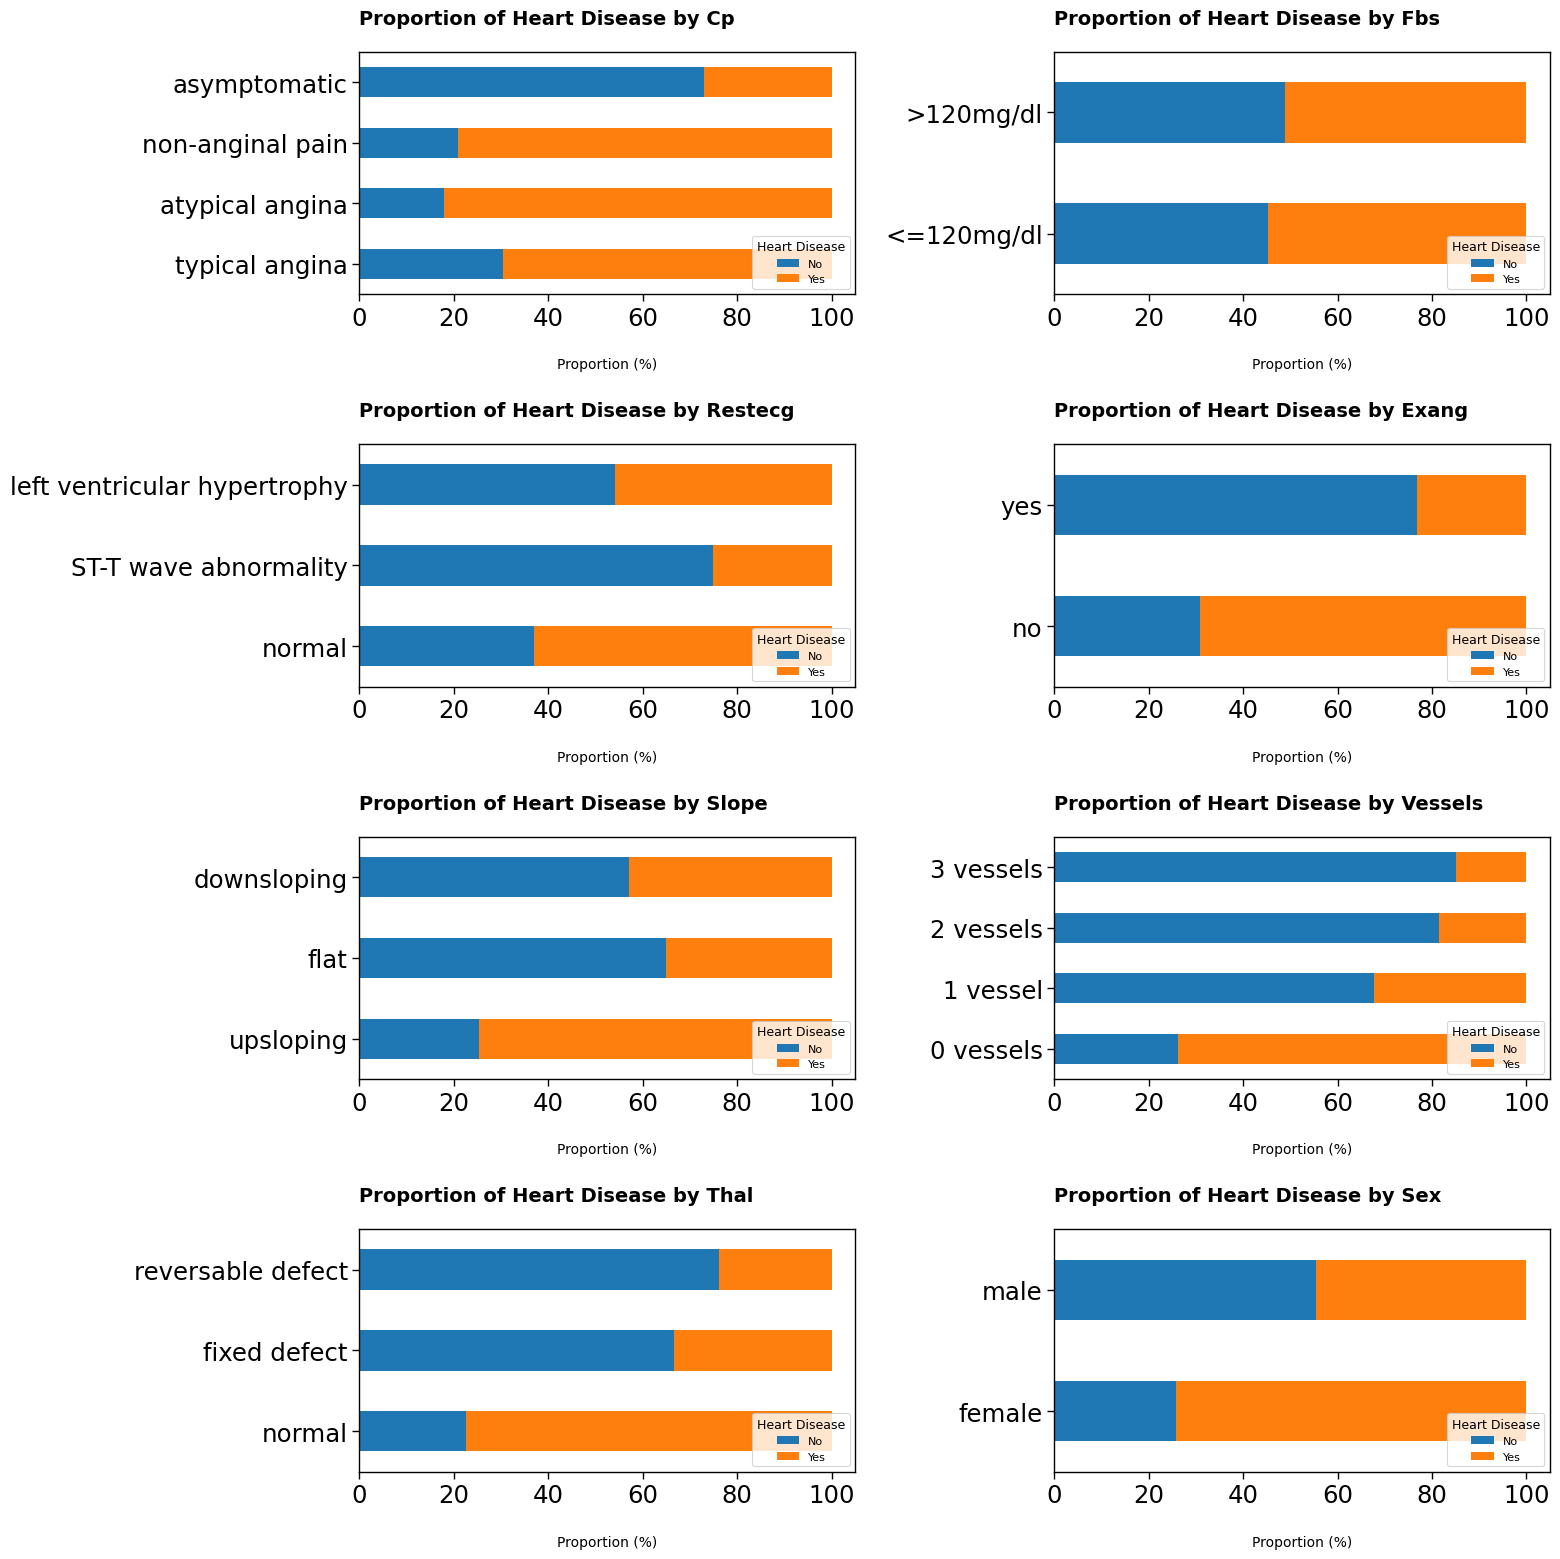

In [573]:
# Liste aller kategorischen Spalten, für die du die Diagramme erstellen möchtest
categorical_columns = ['cp', 'fbs', 'restecg', 'exang', 'slope', 'vessels', 'thal', 'sex']

# Anzahl der Reihen bestimmen, abhängig von der Anzahl der kategorischen Spalten
rows = len(categorical_columns) // 2 + len(categorical_columns) % 2

# Figur und Achsen für Subplots vorbereiten
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 4))
axes = axes.flatten()  # Achsen in ein 1D-Array umwandeln für einfacheren Zugriff

for i, column in enumerate(categorical_columns):
    # Erstelle eine Kreuztabelle zwischen der kategorischen Spalte und der Zielvariablen
    crosstab = pd.crosstab(index=df[column], columns=df['target'], normalize='index') * 100
    
    # Zeichne das Balkendiagramm mit gestapelten Balken horizontal
    crosstab.plot(kind='barh', stacked=True, ax=axes[i])
    
    # Beschriftungen und Titel festlegen und kleiner machen
    axes[i].set_title(f'Proportion of Heart Disease by {column.capitalize()}', fontsize=14, pad=20, loc="left", fontweight="bold")
    axes[i].set_ylabel("", fontsize=10, labelpad=20)
    axes[i].set_xlabel('Proportion (%)', fontsize=10, labelpad=20)
    
    # Anpassung der Legende: kleiner machen und unten rechts platzieren
    axes[i].legend(title='Heart Disease', labels=['No', 'Yes'], fontsize=8, title_fontsize=9, loc='lower right', bbox_to_anchor=(1, 0))

# Verstecke überschüssige Subplot-Achsen, falls die Anzahl der kategorischen Spalten ungerade ist
if len(categorical_columns) % 2 != 0:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


### **Numericals**

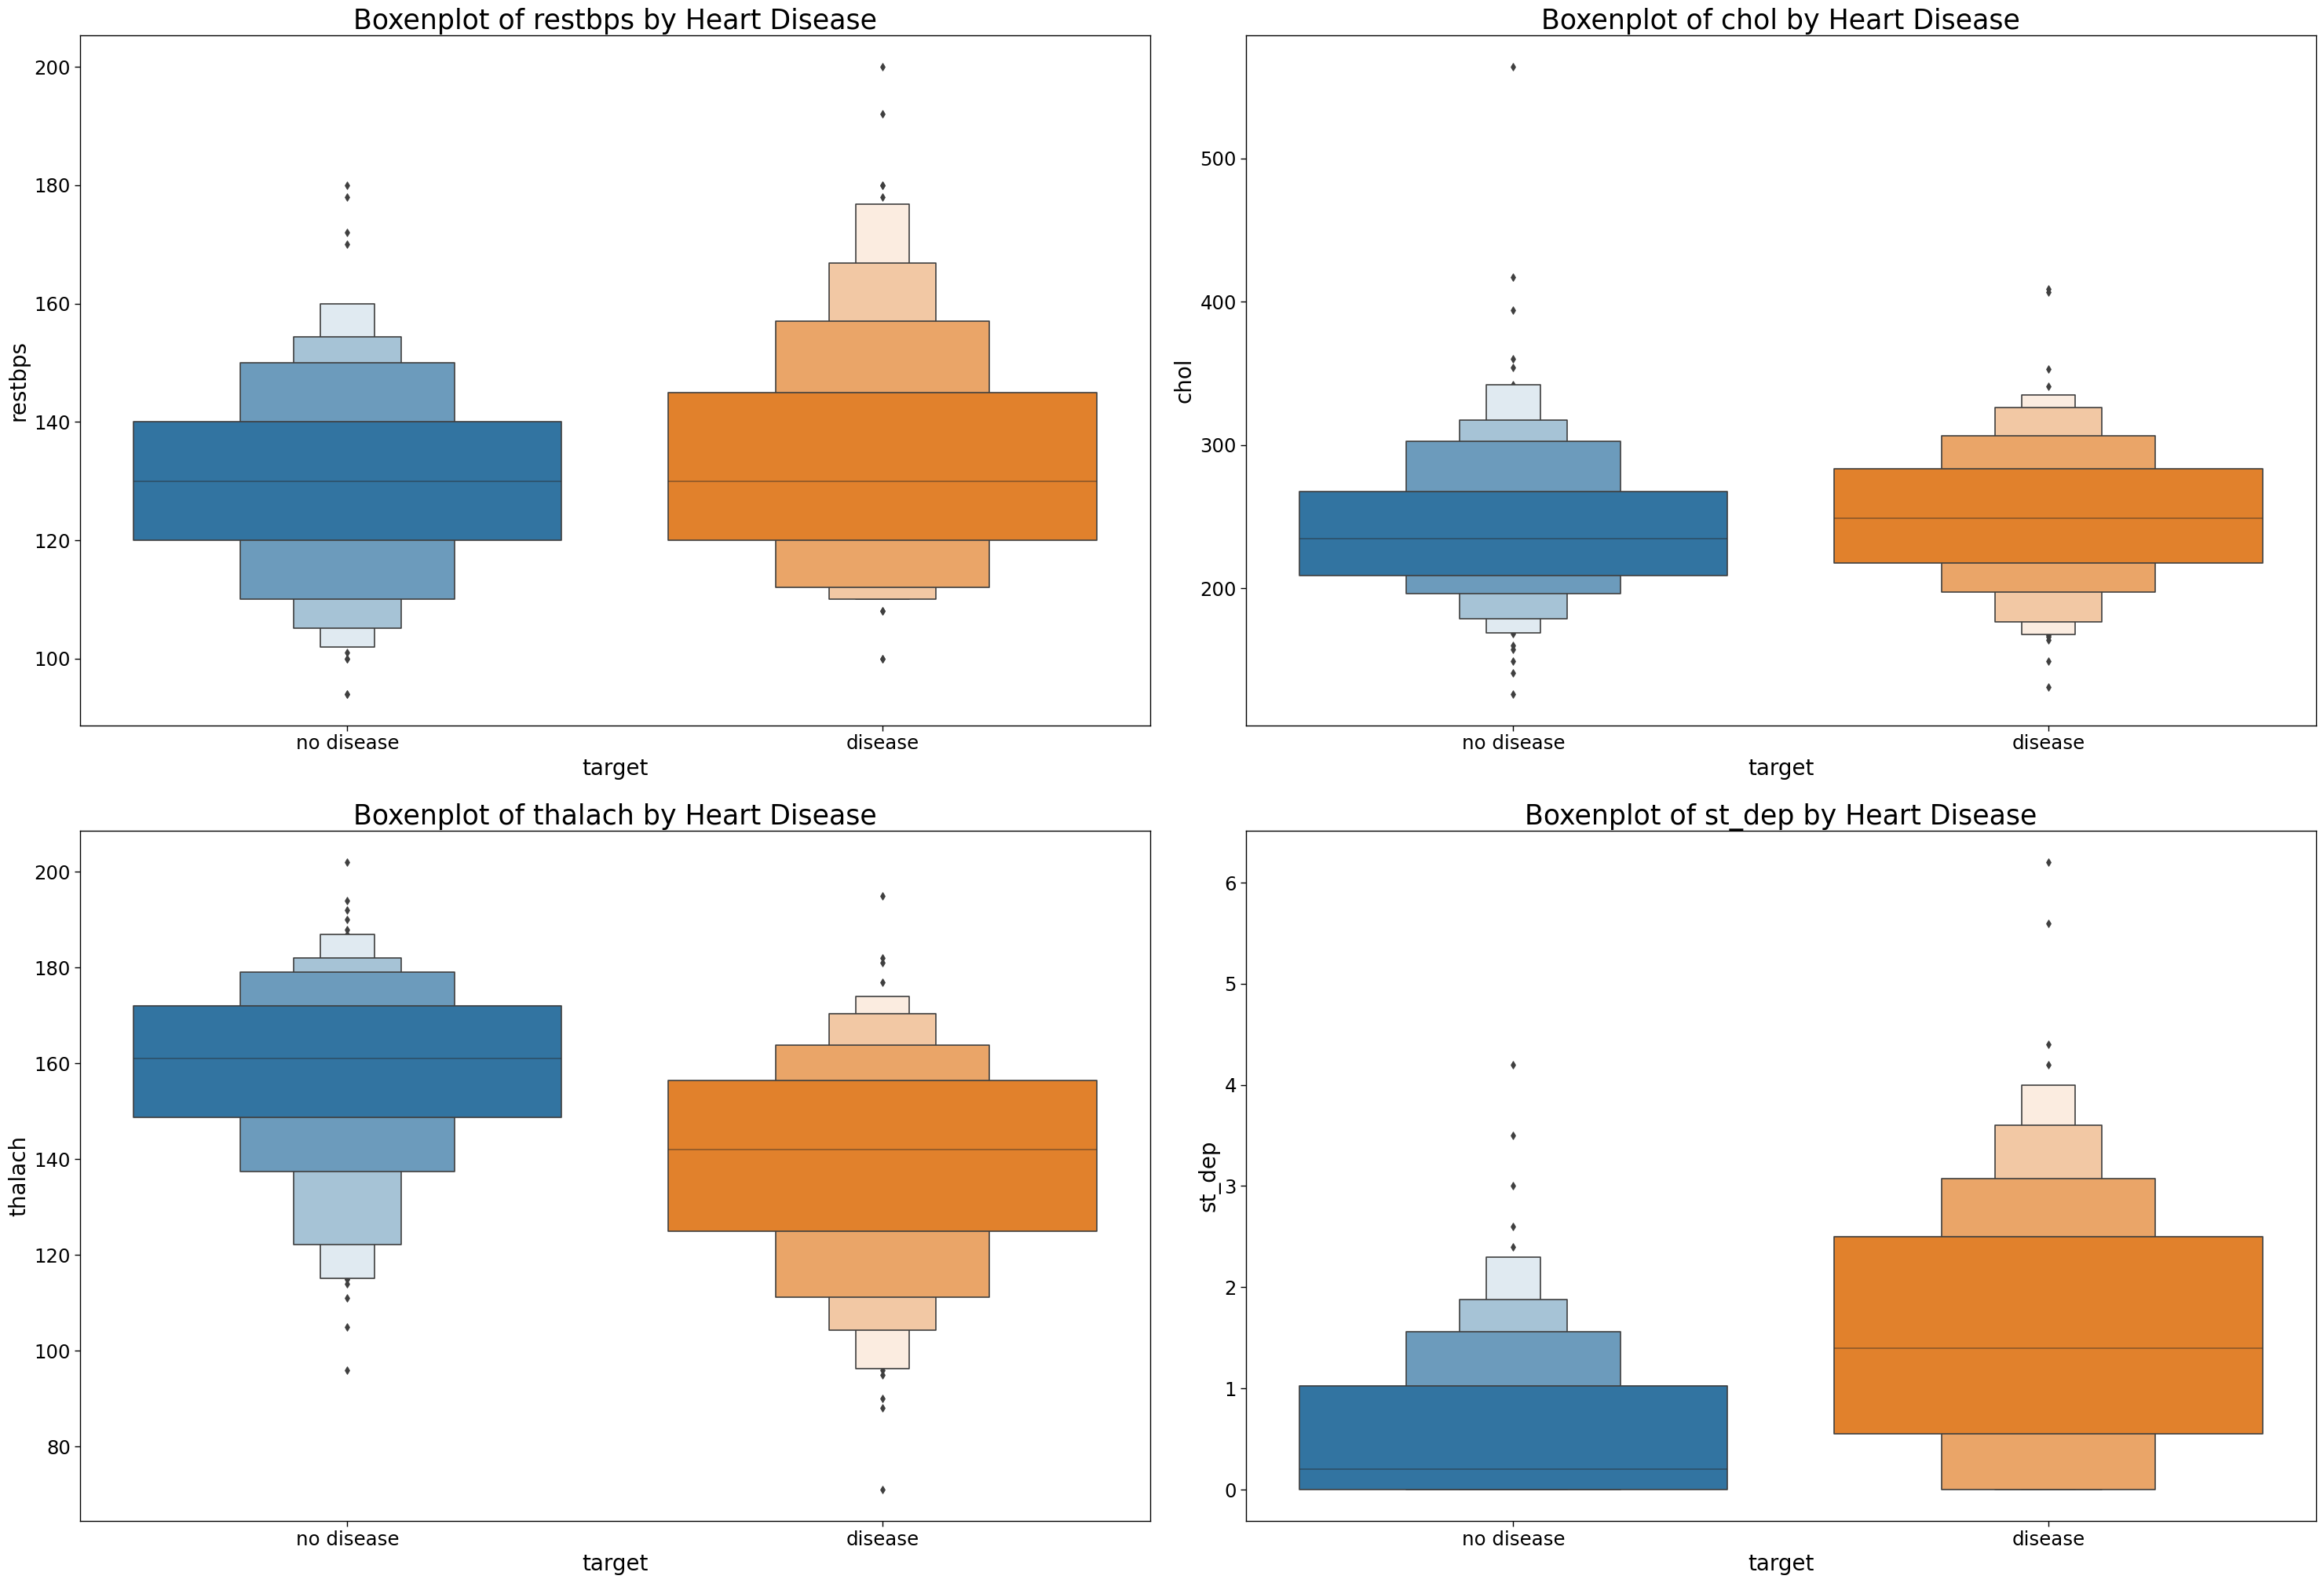

In [574]:
# Liste der numerischen Spalten
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_subplots_per_row = 2

# Erstelle Boxenplots für jede numerische Spalte, aufgeteilt nach der Zielvariable 'target'
plt.figure(figsize=(30, 30))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // num_subplots_per_row + 1, num_subplots_per_row, i + 1)
    sns.boxenplot(x='target', y=column, data=df)
    plt.title(f'Boxenplot of {column} by Heart Disease')

plt.tight_layout()
plt.show()


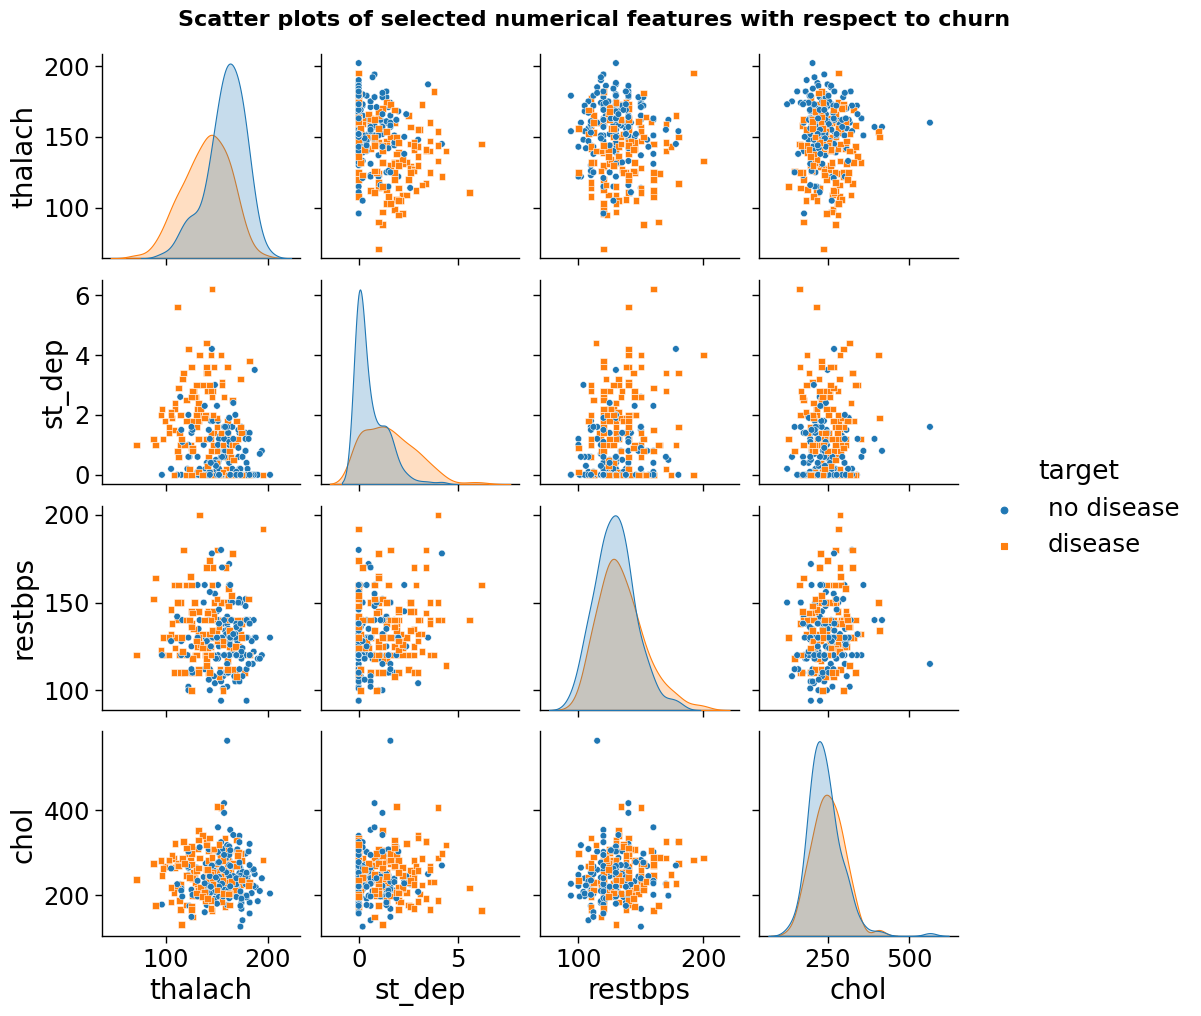

In [575]:
# List of numerical columns for analysis
int_fl_columns = [
    'thalach',
    'st_dep',
    'restbps',
    'chol'
]

# Create scatter plots for selected numerical features with respect to churn status
# 'o' and 's' markers are used to differentiate between the churn categories
# 'kde' is used for the diagonal to show the kernel density estimation for each feature
sns.pairplot(df, vars=int_fl_columns, hue='target', markers=['o', 's'], diag_kind='kde')

# Set the title of the overall figure
plt.suptitle('Scatter plots of selected numerical features with respect to churn', y=1.02, fontsize=16, fontweight="bold")

# Display the resulting plots
plt.show()


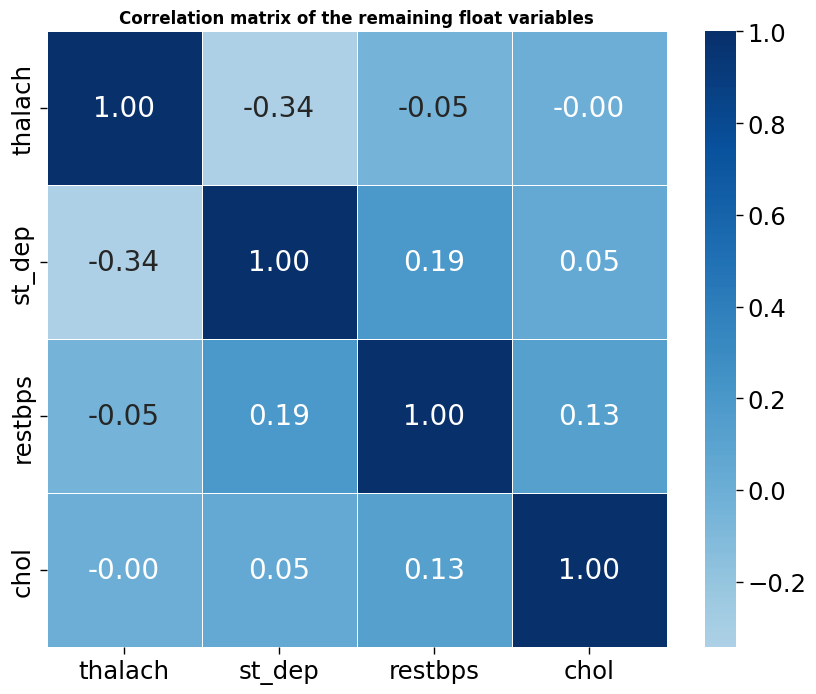

In [597]:

# Calculate the correlation matrix
correlation_matrix = df[int_fl_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix of the remaining float variables', fontweight='bold', fontsize=12)
plt.show()

### The analysis of correlations reveals a complete correlation between the number of calls and the calculated
### costs for each time of day. Therefore, only the columns with minutes will be considered for further regression analysis.


In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sex       303 non-null    category
 1   cp        303 non-null    category
 2   restbps   303 non-null    int64   
 3   chol      303 non-null    int64   
 4   fbs       303 non-null    category
 5   restecg   303 non-null    category
 6   thalach   303 non-null    int64   
 7   exang     303 non-null    category
 8   st_dep    303 non-null    float64 
 9   slope     303 non-null    category
 10  vessels   303 non-null    category
 11  thal      303 non-null    category
 12  target    303 non-null    object  
 13  age_band  303 non-null    category
dtypes: category(9), float64(1), int64(3), object(1)
memory usage: 16.1+ KB


## **Modeling**
### **Prepocessing**

In [578]:
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True) * 100)


no disease    164
disease       139
Name: target, dtype: int64
no disease    54.125413
disease       45.874587
Name: target, dtype: float64


In [579]:
# Ersetzen von 'disease' durch 1 und 'no disease' durch 0 in der 'target'-Spalte
df['target'] = df['target'].replace({'disease': 1, 'no disease': 0})

# Überprüfen Sie die ersten Zeilen, um sicherzustellen, dass die Umwandlung erfolgreich war
print(df['target'].head())


0    0
1    1
2    1
3    0
4    0
Name: target, dtype: int64


In [580]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Defining the columns to scale
columns_to_scale = ['restbps', 'chol', 'thalach', 'st_dep']

# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler to the data and transforming the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Auswahl der Features und Zielvariable
X = df.drop('target', axis=1)
y = df['target']

# One-Hot-Encoding für kategorische Variablen
X = pd.get_dummies(X, drop_first=True)

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 132 to 102
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   restbps                               242 non-null    float64
 1   chol                                  242 non-null    float64
 2   thalach                               242 non-null    float64
 3   st_dep                                242 non-null    float64
 4   sex_male                              242 non-null    uint8  
 5   cp_atypical angina                    242 non-null    uint8  
 6   cp_non-anginal pain                   242 non-null    uint8  
 7   cp_asymptomatic                       242 non-null    uint8  
 8   fbs_>120mg/dl                         242 non-null    uint8  
 9   restecg_ST-T wave abnormality         242 non-null    uint8  
 10  restecg_left ventricular hypertrophy  242 non-null    uint8  
 11  exang_yes        

In [581]:
# Globaler DataFrame für die Speicherung der Metriken aller Modelle
model_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


In [582]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialisieren eines leeren DataFrames zur Speicherung der Modellmetriken
model_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

def print_metrics(y_true, y_pred, model_name, store_metrics=True):
    global model_metrics

    # Berechnung der Metriken
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    if store_metrics:
        # Überprüfung, ob der Modellname bereits existiert, und Aktualisierung, falls ja
        if model_name in model_metrics['Model'].values:
            model_metrics.loc[model_metrics['Model'] == model_name, ['Accuracy', 'Precision', 'Recall', 'F1-Score']] = [acc, precision, recall, f1]
        else:
            # Hinzufügen neuer Modellmetriken, falls das Modell noch nicht existiert
            new_row = {'Model': model_name, 'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
            model_metrics = model_metrics.append(new_row, ignore_index=True)
    
    # Grafische Darstellung der Confusion Matrix und des Classification Reports
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, output_dict=True)
    
    report_df = pd.DataFrame(class_report).transpose()
    report_df = report_df.round(2)
    
    # Grafische Darstellung der Confusion Matrix
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix: {model_name}', fontsize=14, fontweight="bold")
    plt.xlabel('Predicted', labelpad=20)
    plt.ylabel('True', labelpad=20)
    
    # Grafische Darstellung des Classification Reports
    plt.subplot(1, 2, 2)
    sns.heatmap(report_df.drop('support', axis=1), annot=True, cmap='Blues', cbar=False, fmt='g')
    plt.title(f'Classification Report: {model_name}', fontsize=14, fontweight="bold")
    plt.xlabel('Metrics', labelpad=20)
    plt.ylabel('Classes', labelpad=20)
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

# Beispielaufruf der Funktion
# print_metrics(y_test, y_pred, 'Modellname')


In [583]:
def plot_normalized_feature_importances(model, feature_names):
    """
    Plot the normalized feature importances of a fitted model.

    Parameters:
    - model: A fitted model with a feature_importances_ attribute.
    - feature_names: A list of feature names, corresponding to the model's features.
    """
    # Getting feature importances
    try:
        importances = model.feature_importances_
    except AttributeError:
        raise ValueError("Model does not have feature_importances_ attribute.")
    
    # Normalizing the feature importances so that they sum up to 1 (100%)
    importances_normalized = importances / importances.sum()
    
    # Creating a pandas series for easy plotting, with feature names as index
    importances_series = pd.Series(importances_normalized, index=feature_names)
    
    # Plotting the feature importances
    plt.figure(figsize=(10, 8))
    importances_series.sort_values().plot(kind='barh')
    plt.title('Normalized Feature Importances')
    plt.xlabel('Normalized Importance')
    plt.ylabel('Features')
    plt.show()


### **Logistic Regression**

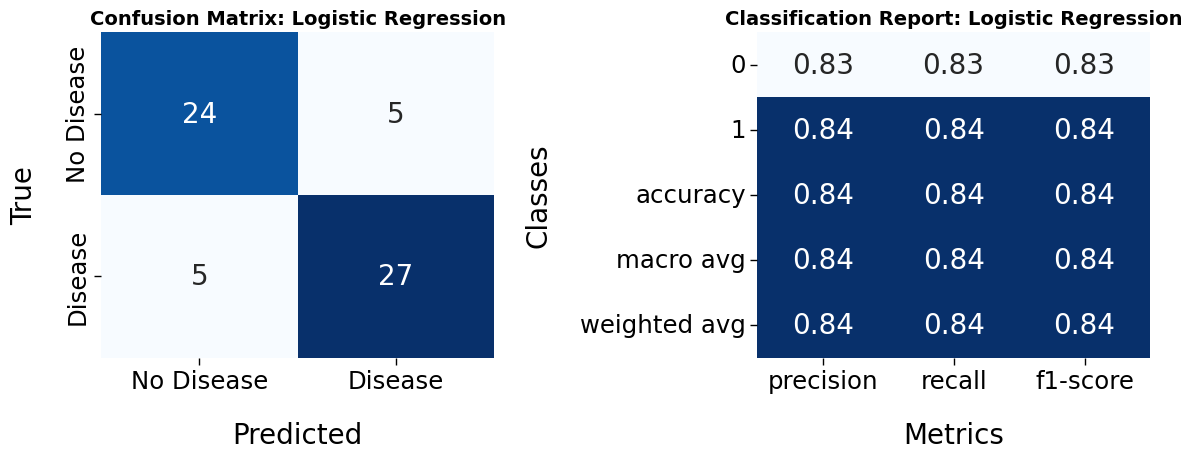

In [584]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model with the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logreg.predict(X_test)

# Using the function to print metrics and plot the confusion matrix and classification report
print_metrics(y_test, y_pred, "Logistic Regression")

### **Naive Bayes**

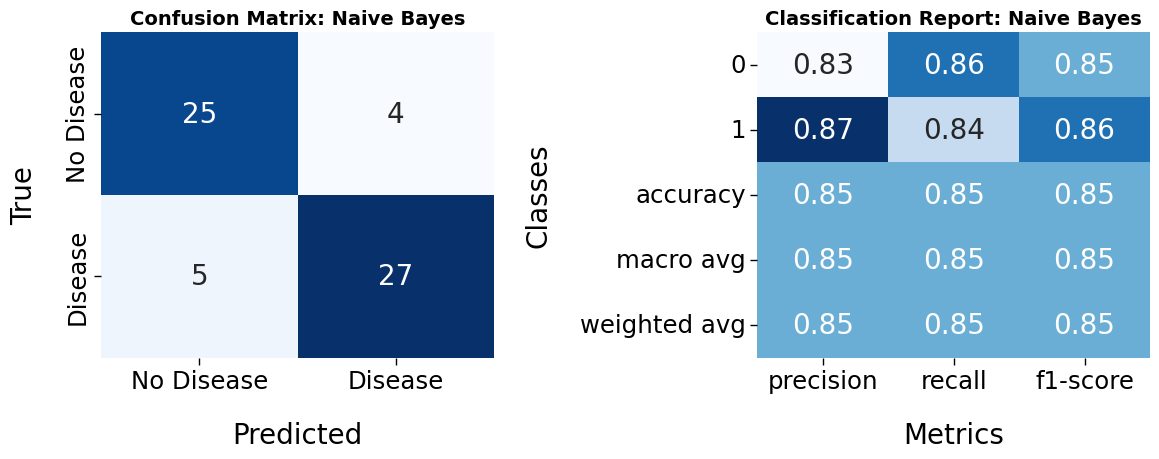

In [585]:
from sklearn.naive_bayes import GaussianNB

# Erstellen des NaiveBayes-Modells
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Vorhersage und Bewertung
nb_pred = nb_model.predict(X_test)
print_metrics(y_test, nb_pred, 'Naive Bayes')


### **Random Forest**

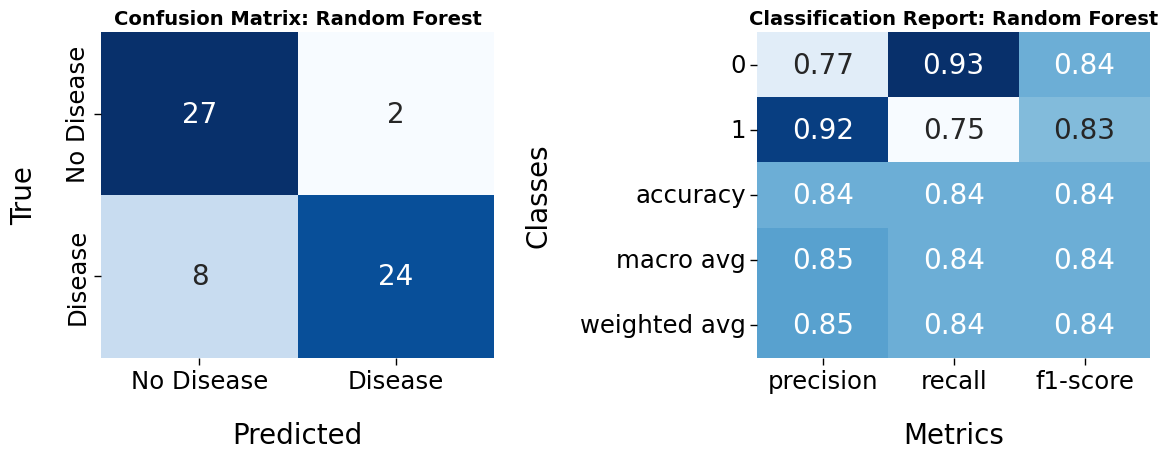

In [586]:
from sklearn.ensemble import RandomForestClassifier

# Erstellen des RandomForest-Modells
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Vorhersage und Bewertung
rf_pred = rf_model.predict(X_test)
print_metrics(y_test, rf_pred, 'Random Forest')


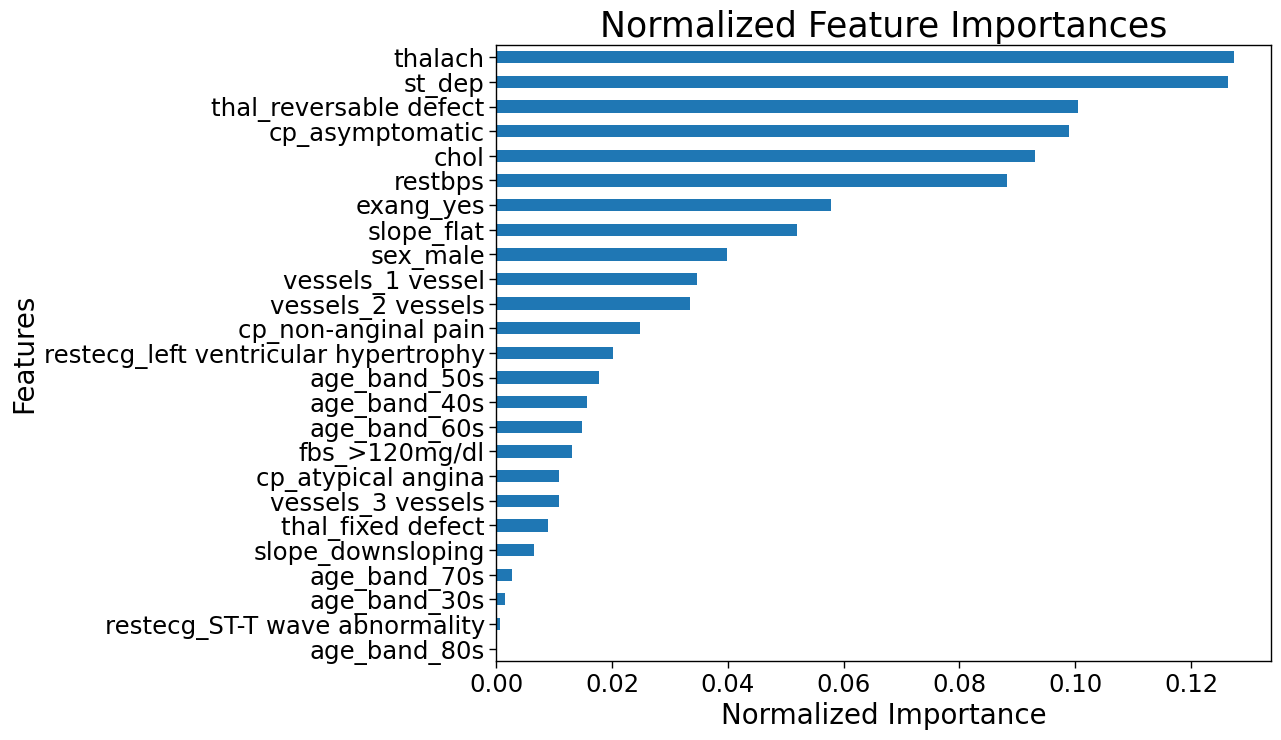

In [587]:
# Plot the feature importances
plot_normalized_feature_importances(rf_model, X_train.columns)

### **Decision Tree**

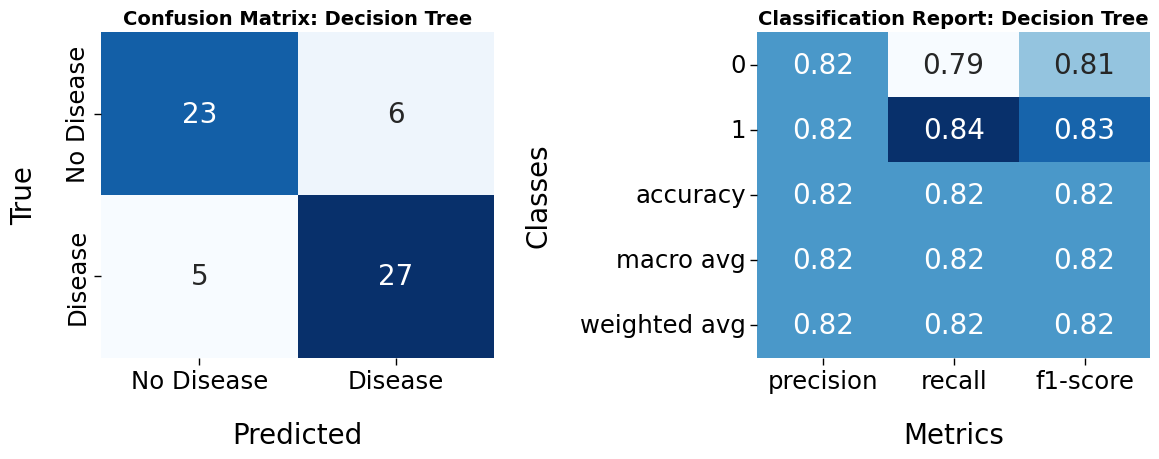

In [588]:
from sklearn.tree import DecisionTreeClassifier

# Erstellen des DecisionTree-Modells
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Vorhersage und Bewertung
dt_pred = dt_model.predict(X_test)
print_metrics(y_test, dt_pred, 'Decision Tree')


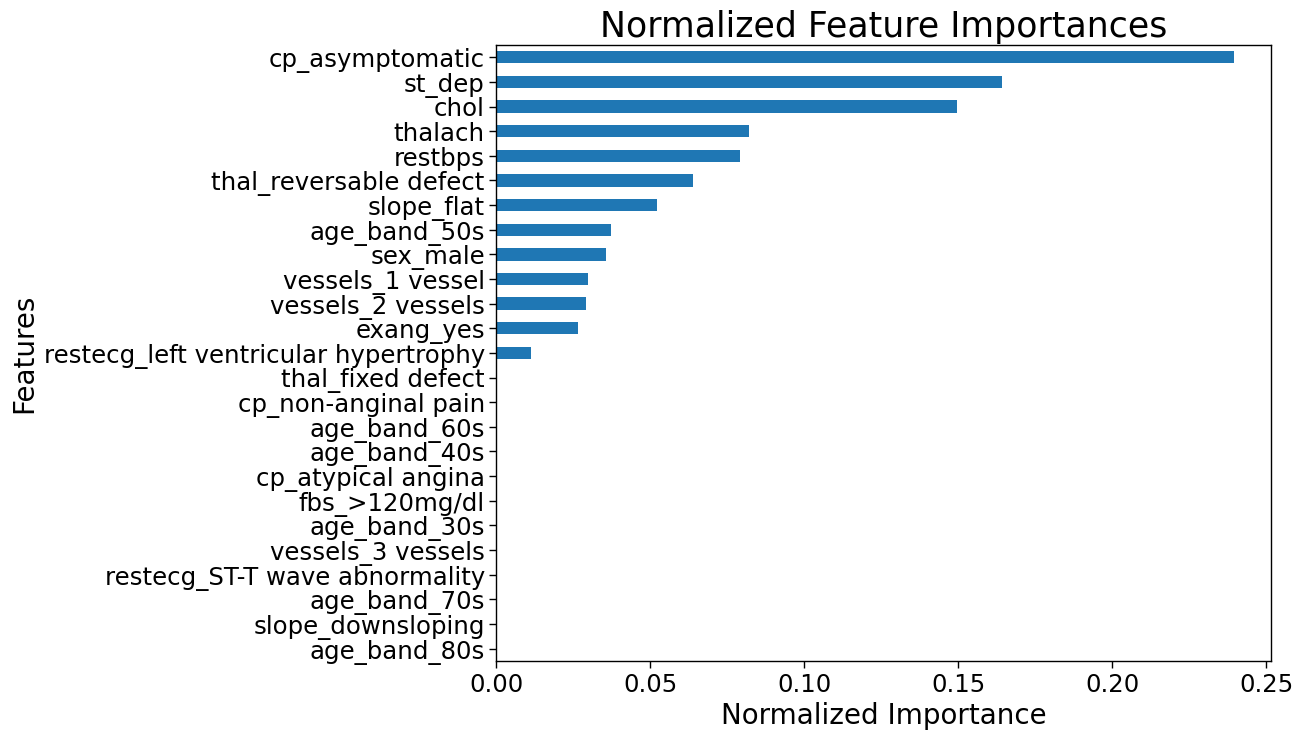

In [589]:
# Plot the feature importances
plot_normalized_feature_importances(dt_model, X_train.columns)

### **XGBoost**

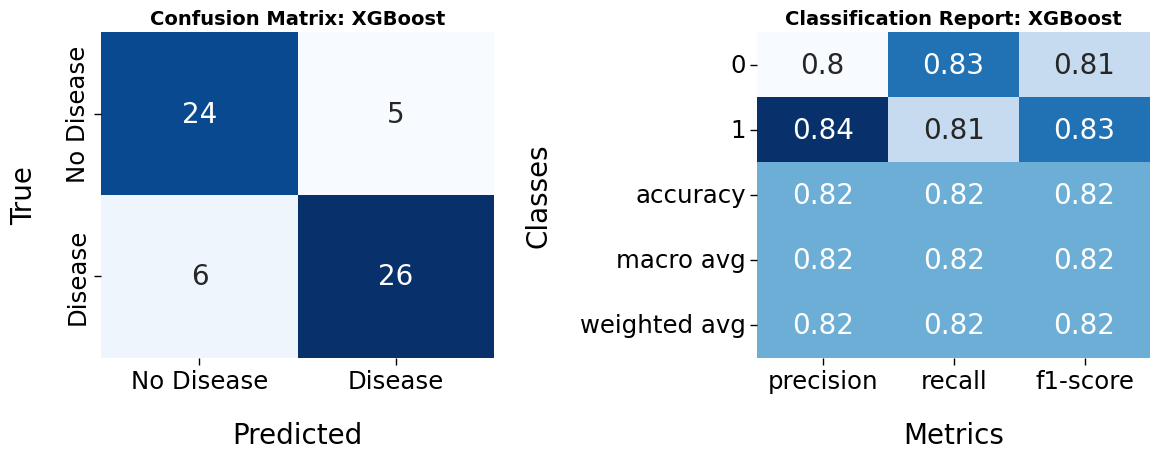

In [590]:
from xgboost import XGBClassifier, plot_importance

# Erstellen des XGBoost-Modells
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Vorhersage und Bewertung
xgb_pred = xgb_model.predict(X_test)
print_metrics(y_test, xgb_pred, 'XGBoost')



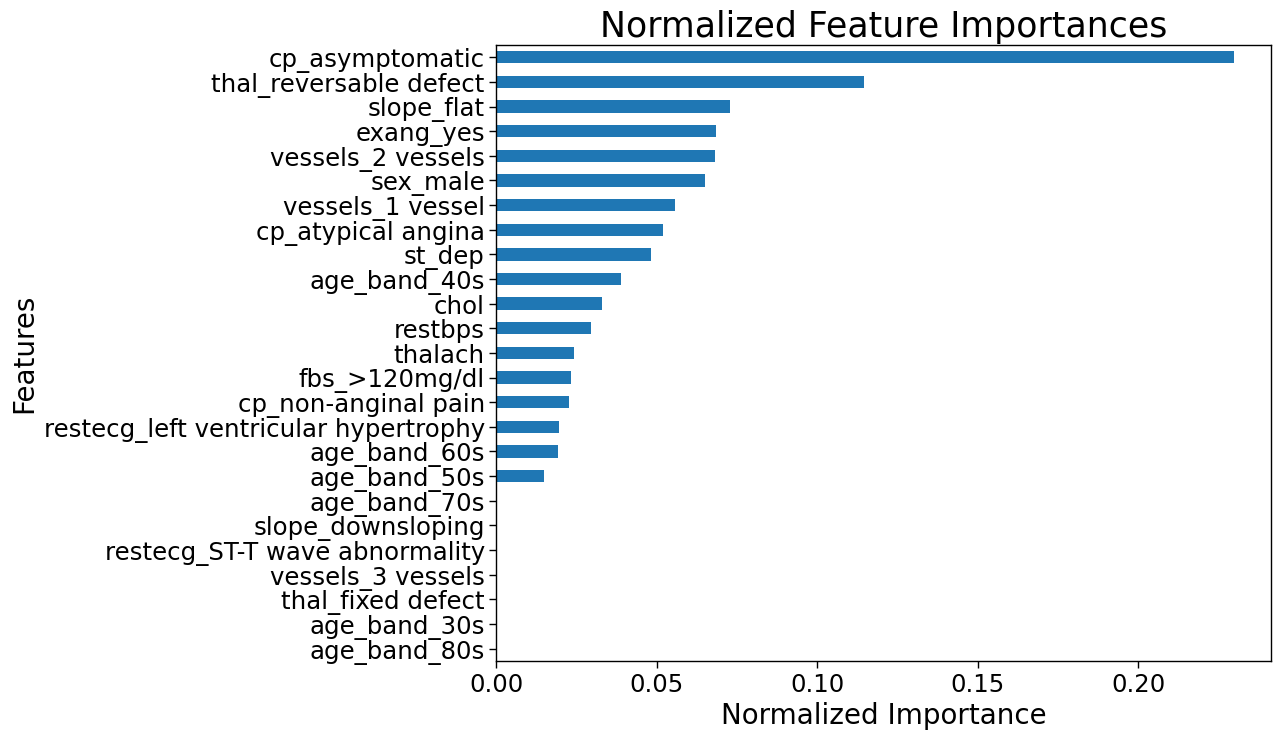

In [591]:
# Plot the feature importances
plot_normalized_feature_importances(xgb_model, X_train.columns)

### **Hyperparameter-Tuning**

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


Best Parameters: {'var_smoothing': 0.0001}
Best Score: 0.7500000000000001


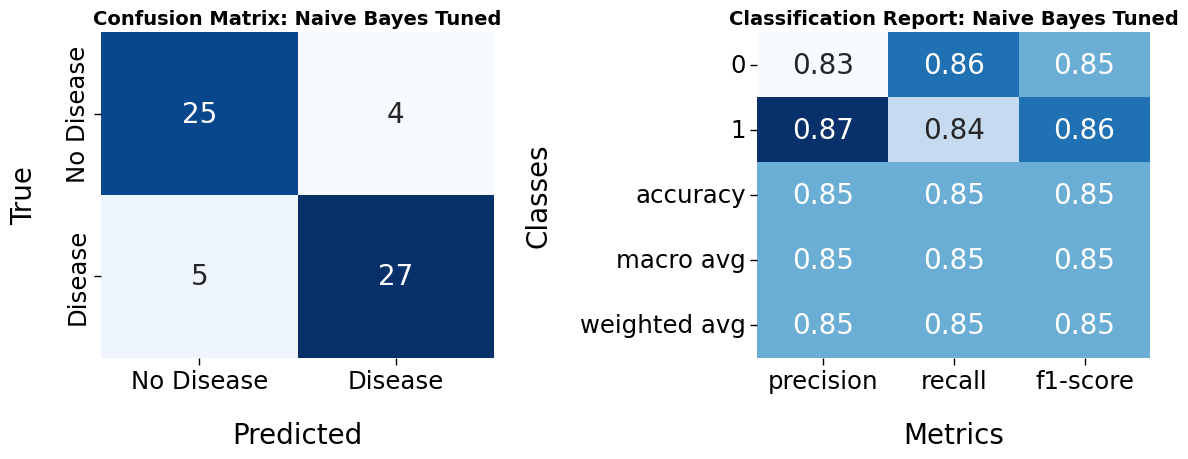

In [592]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import numpy as np

# Erstellen des NaiveBayes-Modells
nb_model_grid = GaussianNB()

# Erstellen des Parametergitters
# Angenommen, die besten Parameter lagen nah an 1e-9, erweitern wir den Bereich um diesen Wert herum
param_grid = {
    'var_smoothing': np.logspace(-4, -10, num=100)  # Feinabstimmung um den Bereich 1e-9
}

# Erstellen des Grid Search Objekts mit angepasstem Scoring auf 'recall', da wir uns besonders auf die Minimierung von falsch negativen Ergebnissen konzentrieren
nb_tuned_Grid = GridSearchCV(estimator=nb_model_grid, param_grid=param_grid, verbose=1, scoring='recall', cv=10)

# Anpassen des Grid Search an die Trainingsdaten
nb_tuned_Grid.fit(X_train, y_train)

# Ausgabe der besten Parameter und der besten Modellleistung
print('Best Parameters:', nb_tuned_Grid.best_params_)
print('Best Score:', nb_tuned_Grid.best_score_)

# Verwenden der besten Parameter, um das Modell zu bewerten
nb_pred_grid = nb_tuned_Grid.predict(X_test)
print_metrics(y_test, nb_pred_grid, 'Naive Bayes Tuned')


### **Model Comparison**

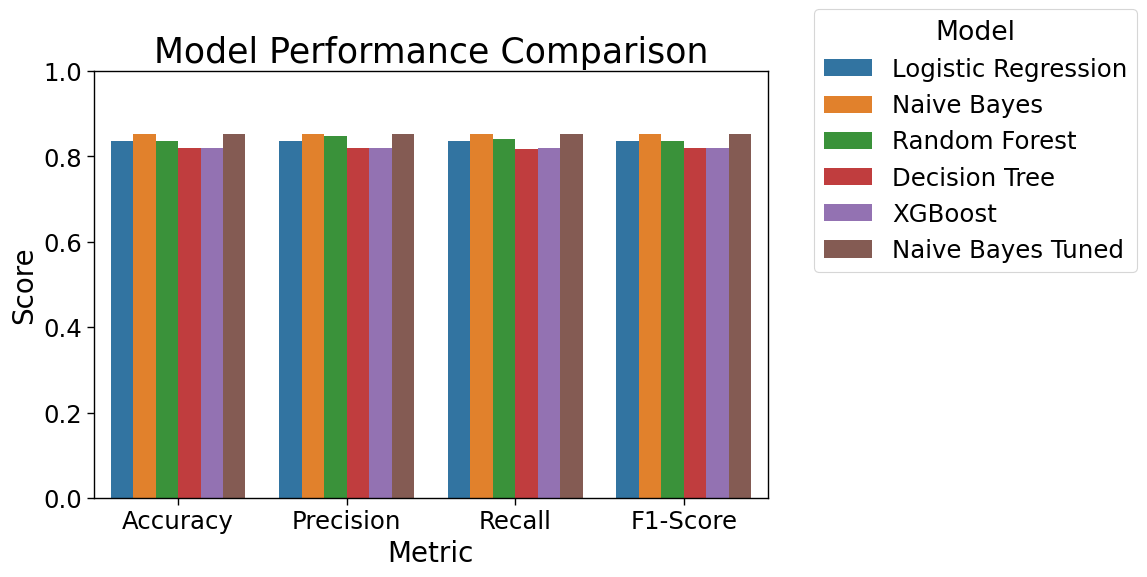

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.836066,0.835668,0.835668,0.835668
1,Naive Bayes,0.852459,0.852151,0.852909,0.852300
2,Random Forest,0.836066,0.847253,0.840517,0.835668
3,Decision Tree,0.819672,0.819805,0.818427,0.818893
4,XGBoost,0.819672,0.819355,0.820043,0.819478
5,Naive Bayes Tuned,0.852459,0.852151,0.852909,0.852300


In [595]:
# Schmelzen des DataFrames, um es mit Seaborn's barplot kompatibel zu machen
melted_df = model_metrics.melt(id_vars=['Model'], var_name='Metric', value_name='Score')

# Erstellen der Grafik
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Metric', y='Score', hue='Model', data=melted_df)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)  # Optional, um die Y-Achse auf den Bereich von 0 bis 1 zu beschränken

# Legende unten rechts platzieren
plt.legend(title='Model', bbox_to_anchor=(1.05, 0.5), loc='lower left')

plt.tight_layout()
plt.show()

# Hervorheben der höchsten Werte in jeder Spalte (außer 'Model')
def highlight_max(s):
    '''
    Hervorheben des maximalen Werts in einer Serie gelb.
    '''
    is_max = s == s.max()
    return ['background-color: skyblue' if v else '' for v in is_max]

styled_df = model_metrics.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
styled_df


## **Summary**